In [ ]:
# !apt-get install -y fonts-nanum
# !rm -rf ~/.cache/matplotlib
# !fc-cache -fv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# your model focuses on during captioning
import matplotlib.pyplot as plt

import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [ ]:
# Download caption annotation files
# annotation_folder = '/annotations/'
# if not os.path.exists(os.path.abspath('.') + annotation_folder):
#   annotation_zip = tf.keras.utils.get_file('captions.zip',
#                                            cache_subdir=os.path.abspath('.'),
#                                            origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
#                                            extract=True)
#   annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
#   os.remove(annotation_zip)

# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)


else:
  PATH = os.path.abspath('.') + image_folder

image_folder = '/val2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('val2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/val2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

6645022720/6645013297 [==============================] - 151s 0us/step


In [ ]:
# 드라이브에 폴더생성
os.mkdir("/content/Multi")

In [ ]:
!unzip -uq "/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/02. 데이터/caption/MultiModule.zip" -d "/content/Multi/"

In [ ]:
len(os.listdir("/content/Multi"))

24010

In [ ]:
# 코랩에 직접적으로 다운하여 작업시 경로변수 설정
path_dir1 = '/content/train2014'
path_dir2 = '/content/val2014'
path_dir3 = '/content/Multi/'

# 드라이브 마운트하여 작업시 경로변수 설정
# path_dir1 = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/train2014'
# path_dir2 = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/val2014'

file_dir1 = os.listdir(path_dir1)
file_dir2 = os.listdir(path_dir2)
len(file_dir1), len(file_dir2) # train image : 82783장 / val image : 40504장

(82783, 40504)

In [ ]:
# 코랩에 직접적으로 다운하여 작업시 경로변수 설정
PATH = '/content/'

In [ ]:
# annotation_file = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/checkpoints(Ko)/MSCOCO_train_val_Korean.json'
# with open(annotation_file, 'r') as f:
#     annotations = json.load(f)

In [ ]:
# len(annotations)

In [ ]:
# annotations[0]['file_path']

In [ ]:
import pandas as pd
df_MS = pd.read_csv('/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/02. 데이터/caption/MS_COCO_데이터정리(완료).csv')
df_MS['사진경로'] = PATH + df_MS['사진경로']
print(len(df_MS))
df_MS.head()

616767


,사진경로,캡셔닝_데이터
0,/content/val2014/COCO_val2014_000000391895.jpg,빨간 헬멧을 쓴 남자가 작은 모터 달린 비포장도로를 달려 있다
1,/content/val2014/COCO_val2014_000000391895.jpg,시골의 비포장도로에서 오토바이를 타는 남자
2,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 뒤에 탄 남자
3,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 위에 젊은이가 탄 비포장도로는 다리가 있는 초록빛 지역의 전경과 구름 낀 ...
4,/content/val2014/COCO_val2014_000000391895.jpg,빨간 셔츠와 빨간 모자를 쓴 남자가 언덕 쪽 오토바이 위에 있다


In [ ]:
import pandas as pd
df_Multi = pd.read_csv('/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/02. 데이터/caption/멀티모달_데이터정리(완료).csv')
df_Multi['사진경로'] = path_dir3 + df_Multi['사진이름']
print(len(df_Multi))
df_Multi.head()

119825


,사진경로,사진이름,캡셔닝_데이터(종합),캡셔닝_데이터,캡셔닝_데이터(수정)
0,/content/Multi/KETI_SHOT_0000145756_KM_0000000...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들이 있다,start 남자들이 있다 end
1,/content/Multi/KETI_SHOT_0000145756_KM_0000000...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들은 서로 쳐다보고 있다,start 남자들은 서로 쳐다보고 있다 end
2,/content/Multi/KETI_SHOT_0000145756_KM_0000000...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 검정 머리이다,start 남자는 검정 머리이다 end
3,/content/Multi/KETI_SHOT_0000145756_KM_0000000...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 흰 셔츠를 입고 있다,start 남자는 흰 셔츠를 입고 있다 end
4,/content/Multi/KETI_SHOT_0000145756_KM_0000000...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 옆을 보고 있다,start 남자는 옆을 보고 있다 end


In [ ]:
# 사진 리사이징시 오류가 생기는 사진 파일 제외
df_Multi = df_Multi[df_Multi['사진이름'] != 'KETI_SHOT_0000142253_KM_0000014468.jpg']
df_Multi = df_Multi[df_Multi['사진이름'] != 'KETI_SHOT_0000123067_KM_0000000834.jpg']
df_Multi.reset_index(drop = True, inplace = True)

In [ ]:
image_path_to_caption = collections.defaultdict(list)
# for val in annotations:
#   for i in range(len(val['caption_ko'])):
#     caption = f"<start> {val['caption_ko'][i]} <end>"
#     image_path = PATH + val['file_path']
#     image_path_to_caption[image_path].append(caption)

for index, val in enumerate(df_Multi['캡셔닝_데이터']):
    caption = f"<start> {val} <end>"
    image_path = df_Multi['사진경로'][index]
    image_path_to_caption[image_path].append(caption)

for index, val in enumerate(df_MS['캡셔닝_데이터']):
    caption = f"<start> {val} <end>"
    image_path = df_MS['사진경로'][index]
    image_path_to_caption[image_path].append(caption)

In [ ]:
# 딕셔너리 형태로 사진이름과 패딩한 캡션 값 저장
print(len(image_path_to_caption))
image_path_to_caption['/content/val2014/COCO_val2014_000000391895.jpg']
image_path_to_caption[df_Multi['사진경로'][0]]
# image_path_to_caption.keys()

147261


['<start> 남자들이 있다 <end>',
 '<start> 남자들은 서로 쳐다보고 있다 <end>',
 '<start> 남자는 검정 머리이다 <end>',
 '<start> 남자는 흰 셔츠를 입고 있다 <end>',
 '<start> 남자는 옆을 보고 있다 <end>']

In [ ]:
image_paths = list(image_path_to_caption.keys())
# random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = image_paths
print(len(train_image_paths), train_image_paths[0], sep = ' ')

147261 /content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg


In [ ]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

In [ ]:
train_captions[:5]

['<start> 남자들이 있다 <end>',
 '<start> 남자들은 서로 쳐다보고 있다 <end>',
 '<start> 남자는 검정 머리이다 <end>',
 '<start> 남자는 흰 셔츠를 입고 있다 <end>',
 '<start> 남자는 옆을 보고 있다 <end>']

In [ ]:
len(img_name_vector), img_name_vector[:6] # 한개의 사진에 달려있는 캡션이 5개 -> 5번째 이미지 벡터의 값이 앞의 내용과 달라짐

(736582,
 ['/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
  '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
  '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
  '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
  '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
  '/content/Multi/KETI_SHOT_0000145755_KM_0000000401.jpg'])

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299)) 
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
# 새로 추가한 파일 중 resize가 안되는 사진 파일 확인
# for path in tqdm(df_Multi['사진경로']): 
#   try:
#     load_image(path)
#   except:
#     print(path)  

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
!pip install tqdm

736582
/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg
<start> 남자들이 있다 <end>
<start> 남자들은 서로 쳐다보고 있다 <end>
<start> 남자는 검정 머리이다 <end>
<start> 남자는 흰 셔츠를 입고 있다 <end>
<start> 남자는 옆을 보고 있다 <end>


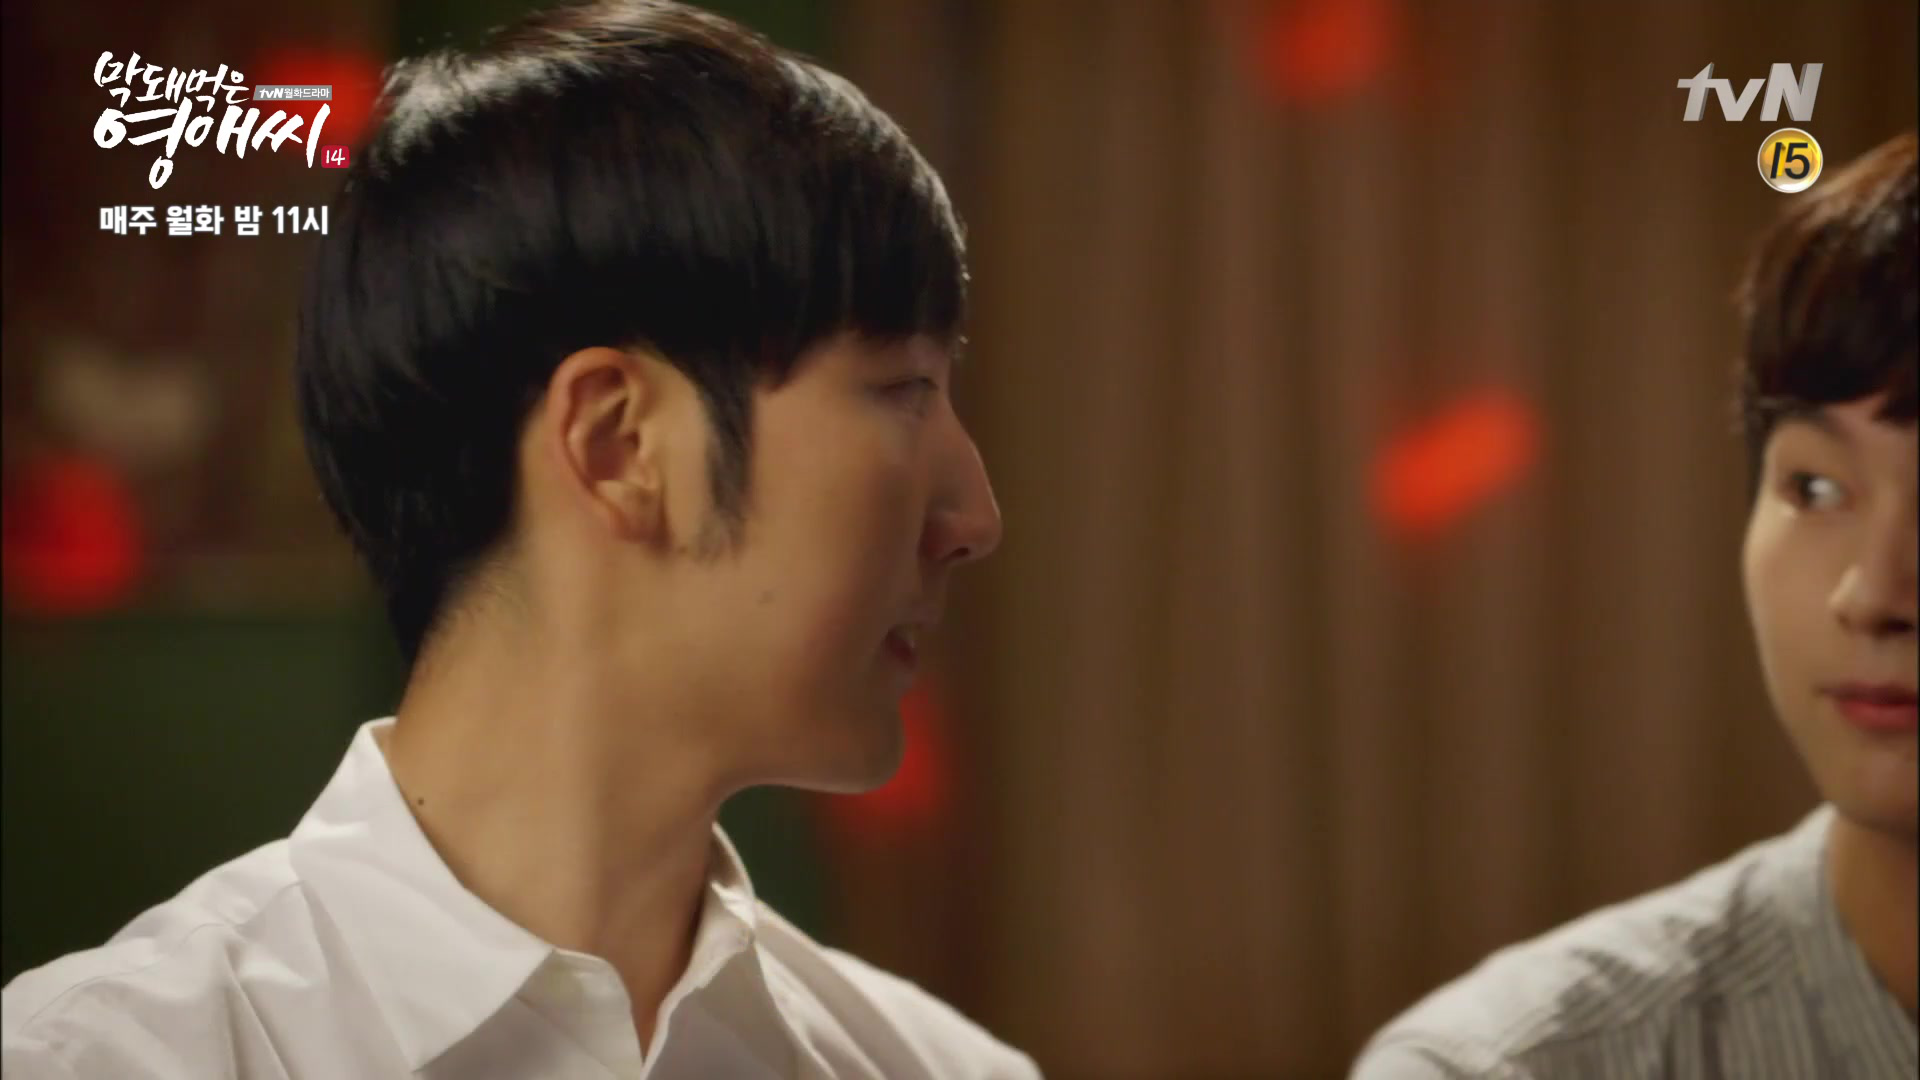

In [ ]:
print(len(img_name_vector), img_name_vector[0], sep = '\n')
for i in train_captions[0:img_name_vector.count(train_image_paths[0])]:
  print(i)
Image.open(img_name_vector[0])

In [ ]:
from tqdm.notebook import tqdm
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

  0%|          | 0/9204 [00:00<?, ?it/s]

In [ ]:
# Find the maximum length of any caption in the dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
# !pip install mxnet
# !pip install gluonnlp pandas tqdm
# !pip install sentencepiece
# !pip install transformers==3.0.2
# !pip install torch

In [ ]:
# !pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

In [ ]:
# Choose the top 5000 words from the vocabulary
top_k = 76343
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(train_captions)

In [ ]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [ ]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [ ]:
tokenizer.index_word[2]

'<start>'

In [ ]:
train_seqs[0]

[2, 348, 4, 3]

In [ ]:
len(tokenizer.index_word)

76343

In [ ]:
key_list = []
value_list = []
for k, v in tokenizer.index_word.items():
  key_list.append(k)
  value_list.append(v)

In [ ]:
import pandas as pd
word_index = pd.DataFrame(columns = ['key', 'value'])
word_index['key'] = key_list
word_index['value'] = value_list
dict(zip(word_index['key'], word_index['value'])) == tokenizer.index_word

True

In [ ]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [ ]:
# 토큰나이저 속성결과 값 드라이브에 저장(체크포인트 활용하여 작업시 필요수치들)
word_index.to_csv('/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/checkpoints(Ko)/tokenizer(index_word).csv', index = False)

In [ ]:
cap_vector[0]

array([  2, 348,   4,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int32)

In [ ]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)
max_length

41

In [ ]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
# 훈련, 검증, 테스트 데이터를 8 : 1 : 1로 분할
img_keys = list(img_to_cap_vector.keys())
# random.shuffle(img_keys) # 추후 재학습을 위해 랜덤셔플은 제거

slice_index1 = int(len(img_keys)*0.8)
slice_index2 = int(len(img_keys)*0.9)
img_name_train_keys, img_name_val_keys, img_name_test_keys = img_keys[:slice_index1], img_keys[slice_index1:slice_index2], img_keys[slice_index2:]

In [ ]:
# 테스트 데이터로 사용할 사진 이름 추출 및 저장
import pandas as pd
df_ti = pd.DataFrame({'testImage_Name' : img_name_test_keys})
df_ti.to_csv('/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/checkpoints(Ko)/testImage_Name.csv', index = False)
df_ti.head()

,testImage_Name
0,/content/train2014/COCO_train2014_000000457734...
1,/content/train2014/COCO_train2014_000000306060...
2,/content/train2014/COCO_train2014_000000283666...
3,/content/train2014/COCO_train2014_000000452985...
4,/content/train2014/COCO_train2014_000000318924...


In [ ]:
print(f'slice_index1 : {slice_index1}, slice_index2 : {slice_index2}')
print(f'훈련 데이터 첫 데이터 : {img_name_train_keys[0]}')
print(f'검증 데이터 첫 데이터 : {img_name_val_keys[0]}')
print(f'테스트 데이터 첫 데이터 : {img_name_test_keys[0]}')

slice_index1 : 117808, slice_index2 : 132534
훈련 데이터 첫 데이터 : /content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg
검증 데이터 첫 데이터 : /content/train2014/COCO_train2014_000000254060.jpg
테스트 데이터 첫 데이터 : /content/train2014/COCO_train2014_000000457734.jpg


In [ ]:
print(f'총 데이터 수 : {len(img_keys)}')
print(f'훈련 데이터 수 : {len(img_name_train_keys)}')
print(f'검증 데이터 수 : {len(img_name_val_keys)}')
print(f'테스트 데이터 수 : {len(img_name_test_keys)}')
len(img_name_train_keys) + len(img_name_val_keys) + len(img_name_test_keys)

총 데이터 수 : 147261
훈련 데이터 수 : 117808
검증 데이터 수 : 14726
테스트 데이터 수 : 14727


147261

In [ ]:
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

img_name_test = []
cap_test = []
for imgv in img_name_test_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_test.extend([imgv] * capv_len)
  cap_test.extend(img_to_cap_vector[imgv])

In [ ]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val), len(img_name_test), len(cap_test)

(589241, 589241, 73666, 73666, 73675, 73675)

In [ ]:
len(img_name_train) + len(img_name_val) + len(img_name_test)

736582

In [ ]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
num_steps_val = len(img_name_val) // BATCH_SIZE
num_steps_test = len(img_name_test) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [ ]:
import json # 체크포인트를 로드하여 작업시 필요한 수치들 저장
values_ne = [dict({'embedding_dim' : 256, 'units' : 512, 'vocab_size' : top_k + 1, 'features_shape' : 2048, 'attention_features_shape' : 64})]
path = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/checkpoints(Ko)/values(necessary).json'
with open(path, 'w') as outfile:
    json.dump(values_ne, outfile)

In [ ]:
with open(path, 'r') as f:
    json_data = json.load(f)
json_data

[{'attention_features_shape': 64,
  'embedding_dim': 256,
  'features_shape': 2048,
  'units': 512,
  'vocab_size': 76344}]

In [ ]:
top_k, vocab_size

(76343, 76344)

In [ ]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [ ]:
len(cap_train), cap_train[0] # img_name_train은 이미지 이름

(589241,
 array([  2, 348,   4,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0], dtype=int32))

In [ ]:
img_name_train[:6]

['/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
 '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
 '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
 '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
 '/content/Multi/KETI_SHOT_0000145756_KM_0000000448.jpg',
 '/content/Multi/KETI_SHOT_0000145755_KM_0000000401.jpg']

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
img_name_val[:6]

['/content/train2014/COCO_train2014_000000254060.jpg',
 '/content/train2014/COCO_train2014_000000254060.jpg',
 '/content/train2014/COCO_train2014_000000254060.jpg',
 '/content/train2014/COCO_train2014_000000254060.jpg',
 '/content/train2014/COCO_train2014_000000254060.jpg',
 '/content/train2014/COCO_train2014_000000087761.jpg']

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((img_name_val, cap_val))

# Use map to load the numpy files in parallel
val_dataset = val_dataset.map(lambda item1, item2: tf.numpy_function(
              map_func, [item1, item2], [tf.float32, tf.int32]),
              num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
img_name_test[:6]

['/content/train2014/COCO_train2014_000000457734.jpg',
 '/content/train2014/COCO_train2014_000000457734.jpg',
 '/content/train2014/COCO_train2014_000000457734.jpg',
 '/content/train2014/COCO_train2014_000000457734.jpg',
 '/content/train2014/COCO_train2014_000000457734.jpg',
 '/content/train2014/COCO_train2014_000000306060.jpg']

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((img_name_test, cap_test))

# Use map to load the numpy files in parallel
test_dataset = test_dataset.map(lambda item1, item2: tf.numpy_function(
              map_func, [item1, item2], [tf.float32, tf.int32]),
              num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val), len(img_name_test), len(cap_test)

(589241, 589241, 73666, 73666, 73675, 73675)

In [ ]:
len(dataset), len(val_dataset), len(test_dataset)

(9207, 1152, 1152)

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [ ]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [ ]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)
embedding_dim, units, vocab_size

(256, 512, 76344)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/checkpoints(Ko)/train(val_image)"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=50) # max_to_keep=3 : 최신체크포인트 중 몇개까지 저장할 건지 지정하는 옵션

In [ ]:
print(ckpt_manager.latest_checkpoint)

/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/checkpoints(Ko)/train(val_image)/ckpt-22


In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [ ]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [ ]:
@tf.function
def val_step(img_tensor, target):
  loss = 0
  hidden = decoder.reset_state(batch_size=target.shape[0]) 
  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
  features = encoder(img_tensor)
  for i in range(1, target.shape[1]):
      # passing the features through the decoder
      predictions, hidden, _ = decoder(dec_input, features, hidden)
      loss += loss_function(target[:, i], predictions)
      total_loss = (loss / int(target.shape[1]))
  return loss, total_loss

In [ ]:
EPOCHS = 25

# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []
loss_plot_val = []
for epoch in tqdm(range(start_epoch, EPOCHS)):
    start = time.time()
    total_loss = 0
    total_loss_val = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 1000 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    
    
    for (batch, (img_tensor, target)) in enumerate(val_dataset):
        batch_loss_val, t_loss_val = val_step(img_tensor, target)
        total_loss_val += t_loss_val
        
        if batch % 500 == 0:
            average_batch_loss_val = batch_loss_val.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss(val) {average_batch_loss_val:.4f}')
    loss_plot_val.append(total_loss_val / num_steps_val)

    # if epoch % 5 == 0:
    ckpt_manager.save()

    print(f'Epoch {epoch+1} : Loss {total_loss/num_steps:.6f} / Loss(val) {total_loss_val / num_steps_val:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 23 Batch 0 Loss 0.2796
Epoch 23 Batch 1000 Loss 0.1967
Epoch 23 Batch 2000 Loss 0.4582
Epoch 23 Batch 3000 Loss 0.4926
Epoch 23 Batch 4000 Loss 0.4257
Epoch 23 Batch 5000 Loss 0.4696
Epoch 23 Batch 6000 Loss 0.4452
Epoch 23 Batch 7000 Loss 0.4272
Epoch 23 Batch 8000 Loss 0.4805
Epoch 23 Batch 9000 Loss 0.5046
Epoch 23 Batch 0 Loss(val) 1.6368
Epoch 23 Batch 500 Loss(val) 1.7950
Epoch 23 Batch 1000 Loss(val) 1.8159
Epoch 23 : Loss 0.399222 / Loss(val) 1.776649
Time taken for 1 epoch 3278.45 sec

Epoch 24 Batch 0 Loss 0.2604
Epoch 24 Batch 1000 Loss 0.1640
Epoch 24 Batch 2000 Loss 0.3935
Epoch 24 Batch 3000 Loss 0.4301
Epoch 24 Batch 4000 Loss 0.4258
Epoch 24 Batch 5000 Loss 0.5103
Epoch 24 Batch 6000 Loss 0.4397
Epoch 24 Batch 7000 Loss 0.4328
Epoch 24 Batch 8000 Loss 0.4706
Epoch 24 Batch 9000 Loss 0.4564
Epoch 24 Batch 0 Loss(val) 1.7174
Epoch 24 Batch 500 Loss(val) 1.7766
Epoch 24 Batch 1000 Loss(val) 1.6688
Epoch 24 : Loss 0.396366 / Loss(val) 1.777500
Time taken for 1 epoch 3

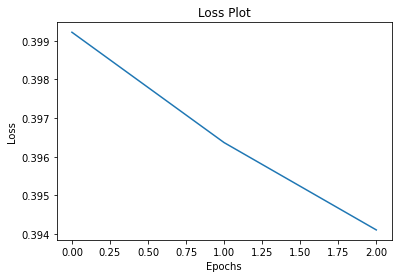

In [ ]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

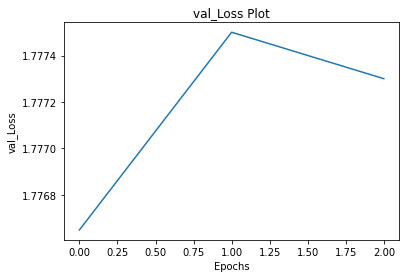

In [ ]:
plt.plot(loss_plot_val)
plt.xlabel('Epochs')
plt.ylabel('val_Loss')
plt.title('val_Loss Plot')
plt.show()

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(np.ceil(len_result/2), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> 그 식사는 맛있어 보이지만 건강에 좋지 않은 평균이다 <end>
Prediction Caption: 크래커 세 개가 담긴 접시 위에 놓여 있다 <end>


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(

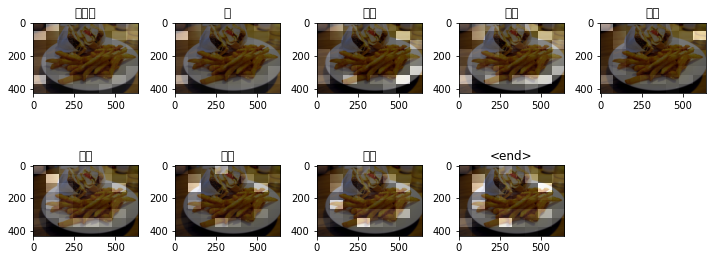

In [ ]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i]
                        for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

In [ ]:
import os
path_dir = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/val2014/'
file_dir = os.listdir(path_dir)
path_dir + file_dir[0]

FileNotFoundError: ignored

In [ ]:
import random 
i = random.randint(0, len(file_dir))
# image_url = 'https://tensorflow.org/images/surf.jpg'
# image_extension = image_url[-3:]
# image_path = tf.keras.utils.get_file('image'+image_extension, origin=image_url)
# image_path = '/content/drive/MyDrive/Colab Notebooks/팀프로젝트/빅데이터 지능형 서비스과정(최종프로젝트)/Image_Captioning(MS COCO, Tensorflow)/test_image/1.jpg'
image_path = path_dir + file_dir[i]


result, attention_plot = evaluate(image_path)
# result, attention_plot = evaluate(img)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)